# NFL Quarterback Evalutation

## Matthew Gauden

## 5 December 2024

<hr style="border:2px solid black">

## Introduction

In this project, I used NFL Quarterback (QB) data from Pro Football Focus for the previous two full seasons: 2022 and 2023. My goals for this project was to find which common stats often used to evaluate QB performance correlated with each other, and correlated with the players who had the most wins. My second goal was to then take this information to place QBs into tiers. I started by determing which QBs had the most wins, as I was then able to examine their fields individually and start placing players into tiers. Throughout this project, you'll notice that everything is seen through the lens of winning. Ultimately, that is why top quarterbacks are paid hundreds of millions of dollars. It is the most premium position in sports in my opinion, so when we are evaluating each player it will always be viewed in relation to their wins and winning percentage. 

This project was important to me because I am a lifelong football fan, and I wanted to find a way to combine data science techniques with the sport I love the most. Anytime you deal with sports, you'll come across a variety of opinions about who the "best" players are. One of my goals was to be objective as possible in my approach. I took my personal views on players and their teams out of the equation, and tried to find if there was a way to determine who the elite QBs are just by using the data.
 
There are a few questions I set out to answer:
- Are there specific stats that translate into winning the most games (correlation to wins)?
- Do the QBs who have the most wins perform the highest across the same statistical fields?
- Is protecting the QB the most prominent indicator of success? 

## Data Explained

The source of my data comes from Pro Football Focus. The data measures important statistics that translate into grades that PFF gives to each player.  These stats go into more detail, and provide more insight than what you might find on the traditional box score. It should be noted that only the QBs who attempted a minimum of 300 passes for each of these seasons were counted. This was to account for outliers such as injured players who missed significant time, backups who only came in for a game or two, and non-QB position players who completed pass attempts off trick plays which could inflate their stats. 

2022
https://premium.pff.com/nfl/positions/2022/REGPO/passing?position=QB&minimum=50p

2023
https://premium.pff.com/nfl/positions/2023/REGPO/passing?position=QB&minimum=50p

The first step I took in cleaning my data was to identify which columns would not be part of my analysis. Those columns were:
 - player_id
 - completion_percent
 - aimed_passes
 - drops
 - ypa
 - position

**Explanation behind dropping each column:**
- The player_id column comes from the source of the data. PFF has information on every player in the NFL, and they assign each player to a player_id. It is not significant or necessary for this project.
- The completion_percent column is misleading. PFF makes an important note that they needed to come up with Accuracy Percentage to account for the problems Completion Percentage presents. Accuracy Percentage takes into account dropped passes, spikes to stop the clock, and throwing the ball away to avoid a sack or turnover. All of these important components of playing quarterback can deflate his Completion Percentage because it assumes that all throws are created equal. Accuracy Percentage takes the quarterback's passes that are on target and actually catchable, so it is a more refined statistic.
- The aimed_passes, drops, and ypa are included in other fields. Aimed passes are included in accuracy_percentage, and drop_rate is a much better look at the totality of a quarterback's season than pure number of drops.
- The ypa is more complicated. Yards Per Attempt (ypa) can be inflated if a quarterback plays in a system where the offensive coordinator takes a lot of shots downfield. Naturally, the more deep balls you throw, the more opprotunities you create for big completions which can affect your ypa. However, avg_depth_of_target accounts for this by purely measuring the average air yards (length of the pass past the line of scrimmage) the ball travels to each target. Average Depth of Target is independent of factors such as scheme, which can inflate a quarterback's stats regardless of their skill.

The next step was to add a "wins" column to the dataframe. PFF does not include the number of wins as its own field, and since it is a large part of my analysis I had to manually add it as a new column. I then derived a "win_percent" column by dividing the "wins" column by the "player_game_count" column. Finally, I created a "tiers" column that separated the QBs into three tiers based on their "win_percent". 


### Data Dictionary

| Measure Name | Description | Type 
| --- | --- | --- | 
| player | Name of quarterback | object | 
| team | Name of player's team | object | 
| player_game_count | How many games the player played in | int | 
| attempts | How many passes the player threw over the course of the season | int |
| avg_depth_of_target | How many yards, on average, past the line of scrimmage the intended receiver was downfield | float | 
| avg_time_to_throw | How many seconds, on average, it took for the quarterback to release the ball | float |
| accuracy_percent | The percentage of the quarterback's on target (catchable) throws that were completed | float |
| drop_rate | The average of the quarterback's throws that were dropped by the receiver | float |
| interceptions | Number of interceptions thrown | int |
| pressure_to_sack_rate | The percentage of dropbacks that result in a sack | float |
| sacks | How many times the quarterback was sacked | int |
| touchdowns | Amount of touchdowns thrown | int |
| turnover_worthy_plays | The number of plays where the quarterback put the ball in jeopardy to be turned over, but didn't result in a turnover | int |
| yards | Passing yards for the season | int |
| wins | The amount of games the team won with that particular quarterback | int | 
| win_percent | The percentage of games the quarterback won in relation to their total game count that season | float |
| tier | The ranking of the quarterback based on win_percent (Elite >.60, Average <= .59, Below Average <.30) | object | 


**A reminder throughout the analysis:**

The primary concern of this project was to evalute QBs based on winning. Therefore, win_percent was used to assign each QB in the data to tiers.
- Elite: win_percent > .60
- Average: win_percent <= .59
- Below Average: win_percent < .30

For example, in his final season in the NFL in 2022, Tom Brady landed in the Average QB group. It would be silly to call arguably the greatest player ever, and the winner of 7 Super Bowls an "average" quarterback. However, following the outlines of the project Brady ended 2022 with a win_percent of .44 which placed him in the Average tier. The Buccaneers ended the 2022 season 8-9, and lost in the first round of the playoffs.




## Results

In [2]:
# Load up modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Setup notebook to display multiple outputs in one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Read in data files
season2023 = pd.read_csv("C:\\Users\\Matthew\\Downloads\\season2023_clean.csv")
season2022 = pd.read_csv("C:\\Users\\Matthew\\Downloads\\season2022_clean.csv")

# Show each file 
season2023.info()
season2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player                 29 non-null     object 
 1   team_name              29 non-null     object 
 2   player_game_count      29 non-null     int64  
 3   accuracy_percent       29 non-null     float64
 4   attempts               29 non-null     int64  
 5   avg_depth_of_target    29 non-null     float64
 6   avg_time_to_throw      29 non-null     float64
 7   drop_rate              29 non-null     float64
 8   interceptions          29 non-null     int64  
 9   pressure_to_sack_rate  29 non-null     float64
 10  sacks                  29 non-null     int64  
 11  touchdowns             29 non-null     int64  
 12  turnover_worthy_plays  29 non-null     int64  
 13  yards                  29 non-null     int64  
 14  wins                   29 non-null     int64  
 15  win_perc

<hr style="border:2px solid black">

### 2023 Season Close-Up

Below is a correlation matrix that shows how each field in the dataframe correlates with the other. A reminder that I am examining everything on the basis of how it relates to winning games. 

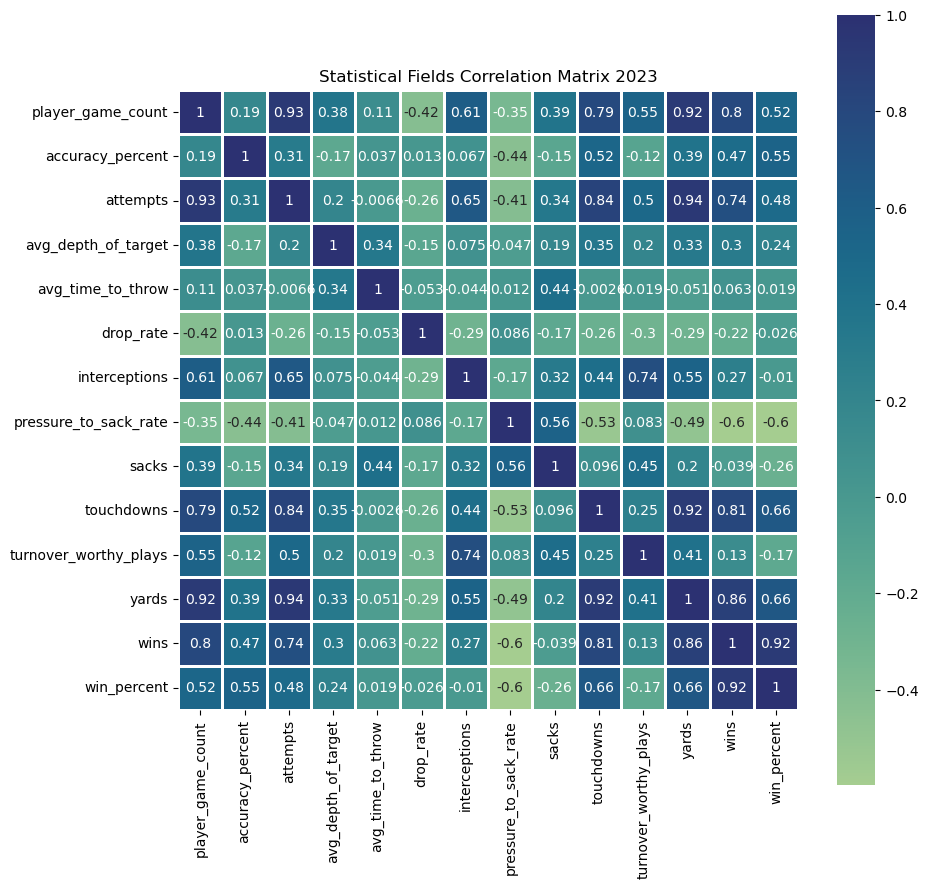

In [6]:
# Building the correlation matrix
columns = ['player_game_count', 'accuracy_percent', 'attempts', 'avg_depth_of_target', 'avg_time_to_throw', 'drop_rate',
           'interceptions', 'pressure_to_sack_rate', 'sacks', 'touchdowns', 'turnover_worthy_plays', 'yards', 'wins', 'win_percent'] 
corr2023 = season2023[columns]
corrmat = corr2023.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True, cmap = 'crest', linewidths = 1)
plt.title('Statistical Fields Correlation Matrix 2023');

**2023 Correlation Matrix Takeaways:**

When looking at the wins row, you can see it shares a positive relationship with a few fields. This helps answer one of my intitial questions that there may be some fields that correlate to a higher number of wins than others. Some of the others, such as player_game_count would not be useful due to the fact that we know the higher the game count means the longer the season. It is then safe to say that naturally a QB whose season is longer wins more because that means his team would be in the playoffs hence the extra games.

Something that surprised me was the correlation between wins and interceptions, which will be addressed in the next section. You'll notice there is a fairly strong negative correlation between wins and pressure_to_sack_rate. This will be examined further down the Results section. 

### Using the Above-Listed Fields to Examine Tier Distribution

Below is a pairplot that will look at how each individual tier of quarterback performed when it comes to the fields we've chosen. An assumption prior to analysis is that we should expect that since the QBs are sorted into tiers on the basis of their win_percent, then those in the Elite tier would perform the highest among these fields since they share a positive relationship with wins.

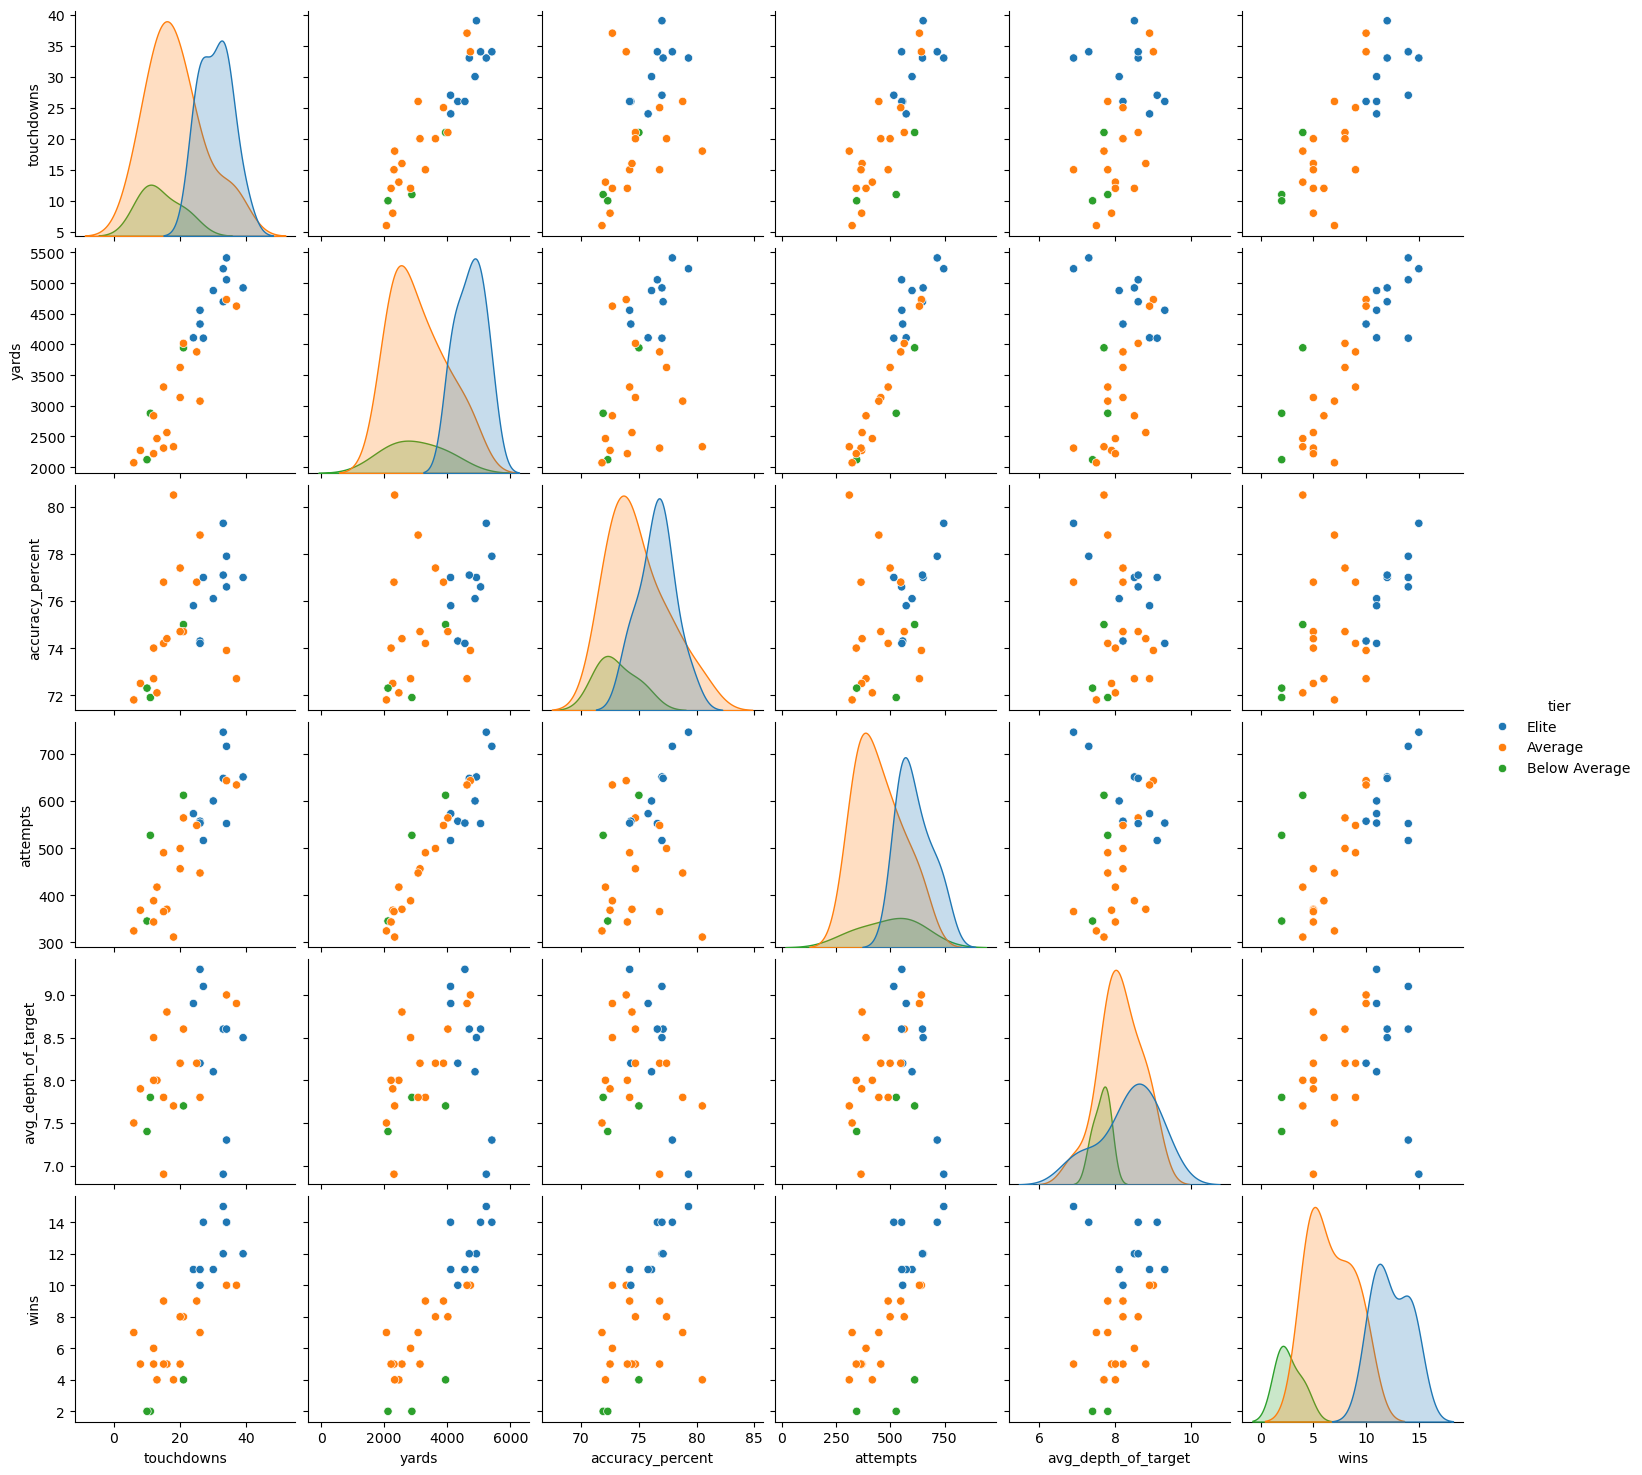

In [8]:
# Creating 2023 pairplot 
columns = ['touchdowns', 'yards', 'accuracy_percent', 'attempts', 'avg_depth_of_target', 'wins', 'tier']

sns.pairplot(season2023[columns], hue = 'tier', kind = 'scatter'); 

### 2023 Pairplot Results
- It can be seen that my hunch in the Introduction may be supported for the 2023 season specifically. This pairplot suggests that Elite QBs (those that win the most) perform the highest in these fields, and that these fields help correlate to on-field success (winning).
- One qualitative takeaway from the data is that the key to winning might be aggressiveness. If you look at the pairplot, it seems on average quarterbacks in the Elite tier have more pass attempts, yards, touchdowns, and a higher avg_depth_of_target. This last field is key because it seems that pushing the ball downfield might be the secret ingredient. This could also explain why there are some Average quarterbacks who have a higher accuracy_percent than their Elite counterparts. After all, the more shots you take downfield the higher the chance of an incompletion or turnover.
- This could explain why the correlation matrix displayed a positive relationship between wins, and both interceptions and turnover_worthy_plays.
- It should be noted that the player with the most wins in 2023, Patrick Mahomes, had one of the lowest avg_depth_of_target scores in the dataset, so he would be an outlier. 

### The Importance of Protecting the Quarterback

Returning to an observation we made from the correlation matrix, it is found that there is a fairly strong negative correlation between wins and pressure_to_sack_rate.

One of the questions I asked in the Introduction was "Is protecting the QB the most prominent indicator of success?". Purely from looking at the matrix it would suggest yes, but we can examine further with a bar chart that displays the mean of pressure_to_sack_rate across all tiers. This can show us if Elite quarterbacks win in large part due to having a lower percentage of their dropbacks result in sacks.

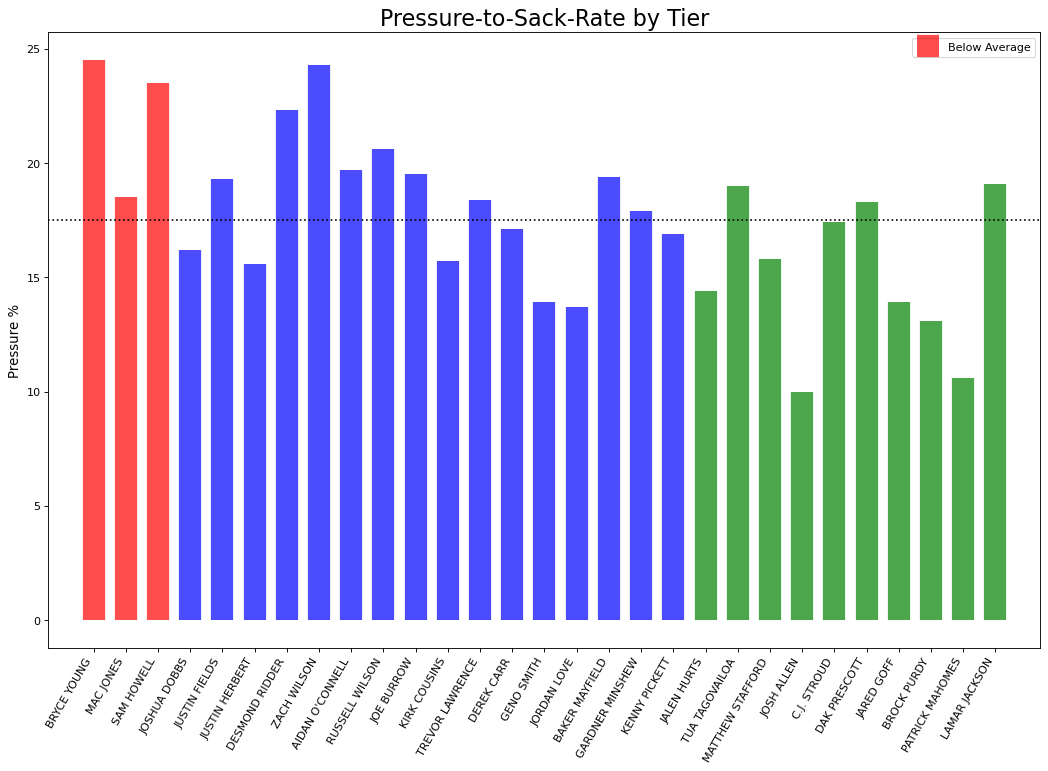

In [10]:
# Sort values and organize by tier lowest to highest
season2023.sort_values('win_percent', inplace=True)

# Add colors to identify tiers
color = ['red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
         'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 
         'green', 'green']

# Create graph
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi=80)
ax.vlines(x=season2023.player, ymin=0, ymax=season2023.pressure_to_sack_rate, color = color, alpha=0.7, linewidth=20);
ax.set_title('Pressure-to-Sack-Rate by Tier', fontdict={'size':20});
plt.xticks(season2023.player, season2023.player.str.upper(), rotation=60, horizontalalignment='right', fontsize=10);
plt.ylabel('Pressure %', size = 12)
ax.legend(['Below Average', 'Average', 'Elite'])

# Find mean to compare tiers
mean = season2023['pressure_to_sack_rate'].mean().round(1)
plt.axhline(mean, color = 'black', ls = 'dotted')


plt.show();


*Quarterbacks are arranged by tier, starting with Below Average and ending with Elite*

**Bar Chart Conclusions**
- The dotted horizontal line displays the mean pressure_to_sack_rate for the 2023 season.
- There are 10 QBs in the Elite tier, denoted by the green bars. Of these Elite players, 7/10 had a below average pressure_to_sack_rate.
- This seems support my initial hunch, as well as what we saw in the correlation matrix, that a prominent indicator of success (winning) is determined by the percentage of your quarterback's dropbacks that result in a sack.
- Intuitively this makes sense as well. The higher the chance a QB is sacked, the increased likelihood of multiple factors that are not conducive to success. These could be loss of yards, turnover, injury, etc.

<hr style="border:2px solid black">

## 2022 Season Close-Up

We repeat the same process we used for 2023. 

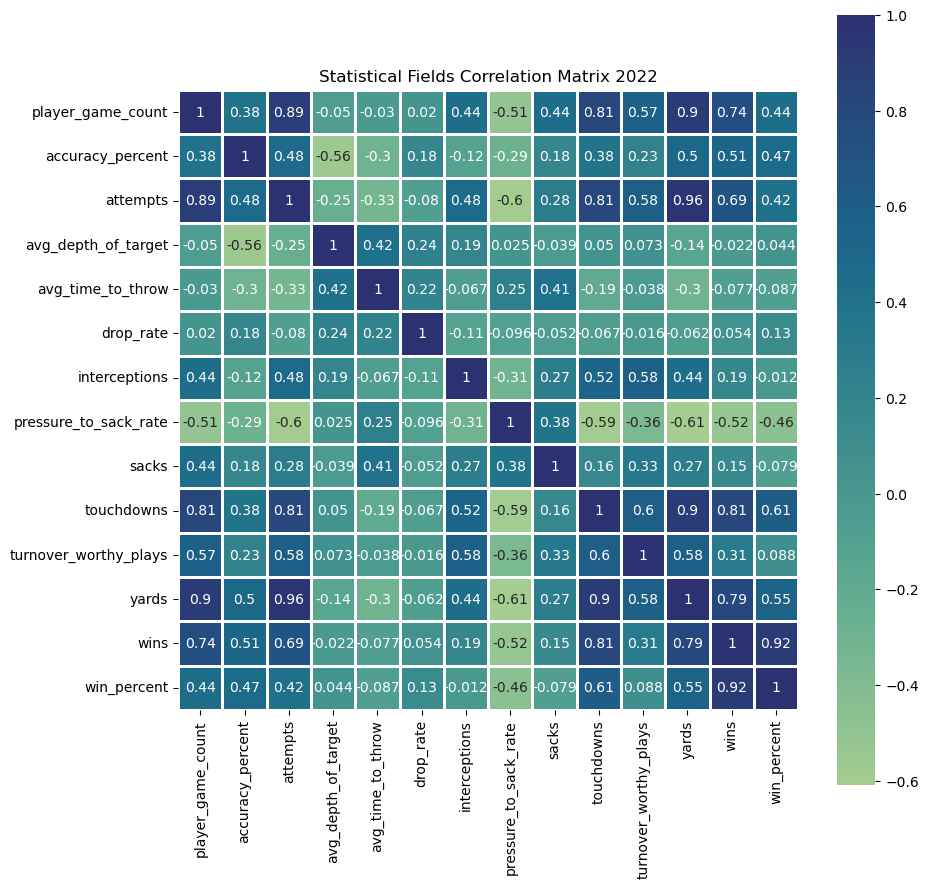

In [12]:
# Building a correlation matrix
columns = ['player_game_count', 'accuracy_percent', 'attempts', 'avg_depth_of_target', 'avg_time_to_throw', 'drop_rate',
           'interceptions', 'pressure_to_sack_rate', 'sacks', 'touchdowns', 'turnover_worthy_plays', 'yards', 'wins', 'win_percent'] 
corr2022 = season2022[columns]
corrmat = corr2022.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True, cmap = 'crest', linewidths = 1)
plt.title('Statistical Fields Correlation Matrix 2022');

**2022 Correlation Matrix Takeaways:**

Many of the same fields we examined from the matrix in relation to wins for the 2023 season still hold positive relationships, albeit not as strong. An interesting observation is that "avg_depth_of_target" took a hit from 2023. This means that QBs actually saw more success by taking less chances downfield. However, it should be noted that this is a very small negative correlation.

Like what can be seen in 2023, pressure_to_sack_rate has a clear negative effect on wins.

### Using the Above-Listed Fields to Examine Tier Distribution 

Like in 2023, we can create a pairplot that examines the fields that share a strong relationship with wins.

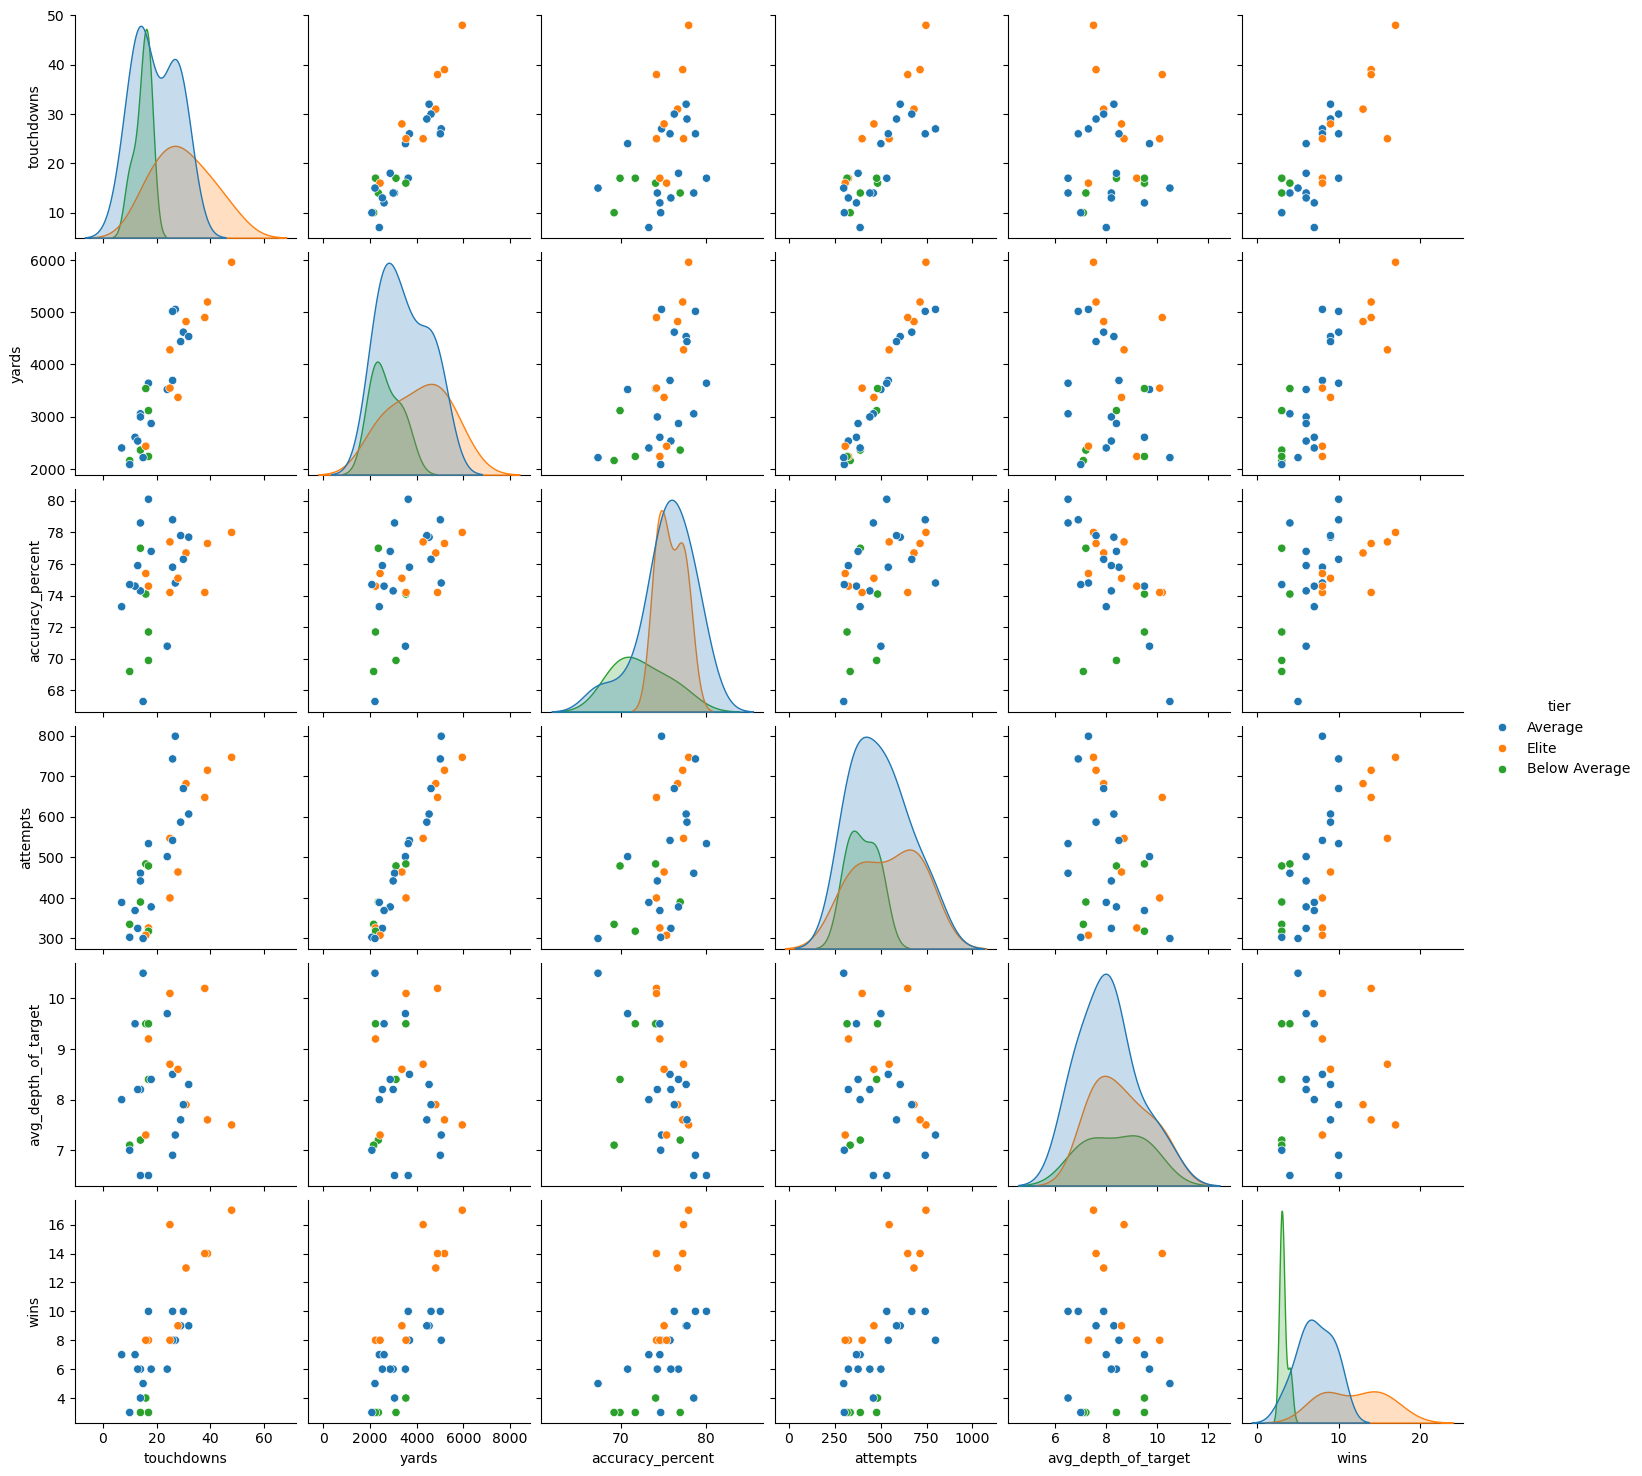

In [14]:
# Creating 2022 pairplot
columns = ['touchdowns', 'yards', 'accuracy_percent', 'attempts', 'avg_depth_of_target', 'wins', 'tier']

sns.pairplot(season2022[columns], hue = 'tier', kind = 'scatter'); 

### 2022 Pairplot Results
*Note the change in hue for the tiers.*
- For the 2022 season, we see a much more even distribution. While the truly Elite QBs are much clearer in this pairplot, they didn't perform the same way we saw in the 2023 season.
- There were several Elite QBs who were outperformed in these fields by Average, and even Below Average quarterbacks.
- This suggests that these fields may not correlate strongly with wins all the time. It may fluctuate given how each season plays out. 

### The Importance of Protecting the Quarterback 2.0

I think the analysis used for the 2023 season on the effect of pressure_to_sack_rate on wins was very telling. Here we repeat the analysis to see if we can duplicate the results of our hypothesis that protecting the QB is of the upmost importance.

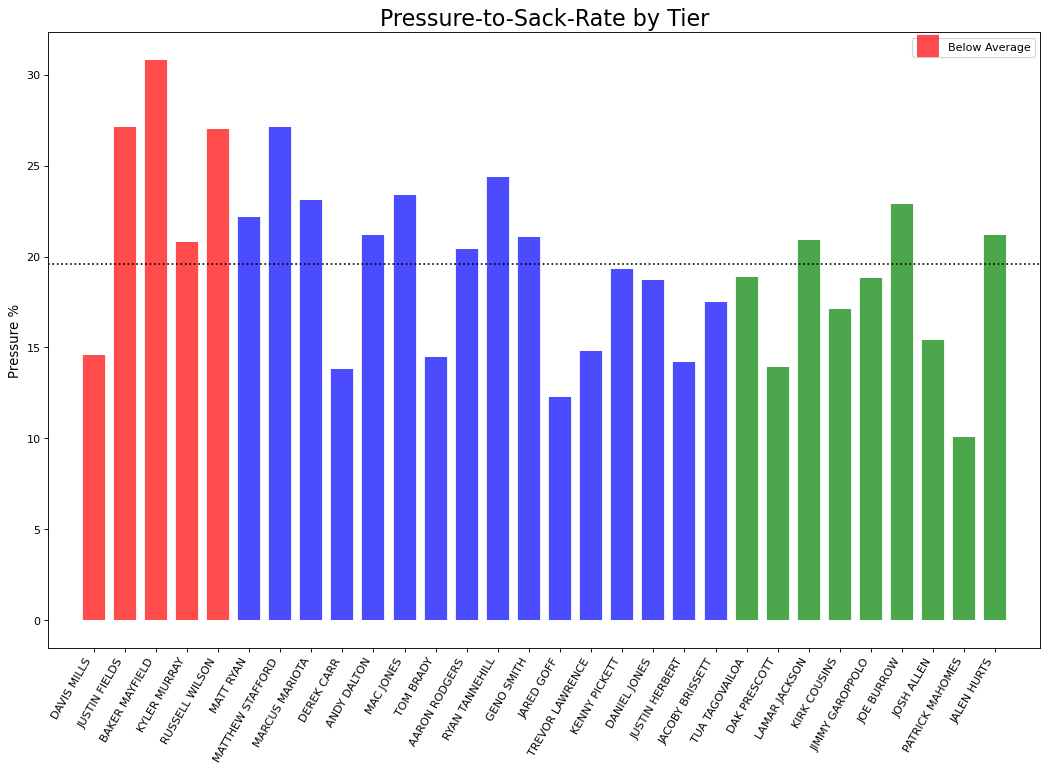

In [16]:
# Sort values and organize by tier lowest to highest
season2022.sort_values('win_percent', inplace=True)

# Add colors to identify tiers
color = ['red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
         'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 
         'green', 'green', 'green']

# Create graph
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi=80)
ax.vlines(x=season2022.player, ymin=0, ymax=season2022.pressure_to_sack_rate, color = color, alpha=0.7, linewidth=20);
ax.set_title('Pressure-to-Sack-Rate by Tier', fontdict={'size':20});
plt.xticks(season2022.player, season2022.player.str.upper(), rotation=60, horizontalalignment='right', fontsize=10);
plt.ylabel('Pressure %', size = 12)
ax.legend(['Below Average', 'Average', 'Elite'])

# Find mean to compare tiers
mean = season2022['pressure_to_sack_rate'].mean().round(1)
plt.axhline(mean, color = 'black', ls = 'dotted')


plt.show();

*Quarterbacks are arranged by tier, starting with Below Average and ending with Elite*

**Bar Chart Conclusions**
- For the 2022 season, the principle still holds. By and large, the Elite quarterbacks (green) have a lower sack_to_pressure_rate than the Average or Below Average groups. In this season, there are 9 Elite QBs and once again the majority (6/9) are below the mean pressure_to_sack_rate across all tiers. 
- Outside the data, this can be due to multiple factors. A lot of the quarterbacks you see in the Elite tier also have the ability to escape the pocket and make plays with their legs. This can drive down the percentage of their dropbacks that result in sacks compared to some of the QBs in the other tiers who aren't as mobile.
- There is also the benefit of investing in an offensive line. Many of the Elite QBs such as Lamar Jackson, Patrick Mahomes, and Jalen Hurts, play for teams that have highly-regarded offensive linemen and coaches. This obviously lends a hand to high-performance when you are under pressure less often than the majority of the league. 

<hr style="border:2px solid black">

### Examining the Best of the Best

If we separate the QBs even further, we can see that Patrick Mahomes is the only quarterback to not only appear in the top 5 both seasons, but he has the most wins in each season. This makes sense as the Kansas City Chiefs are reigning back-to-back Super Bowl Champions. 

A heatmap can show how Mahomes compares to the rest of the top 5 in each category. 

In [18]:
top5_2023 = season2023.sort_values(by = ['wins'], ascending = False)[:5]
top5_2023.style.background_gradient(cmap = 'Greens')

,player,team_name,player_game_count,accuracy_percent,attempts,avg_depth_of_target,avg_time_to_throw,drop_rate,interceptions,pressure_to_sack_rate,sacks,touchdowns,turnover_worthy_plays,yards,wins,win_percent,tier
0,Patrick Mahomes,KC,20,79.300000,746,6.900000,3.000000,6.300000,15,10.600000,32,33,22,5234,15,0.750000,Elite
15,Lamar Jackson,BLT,18,77.000000,516,9.100000,3.210000,6.800000,8,19.100000,44,27,19,4102,14,0.780000,Elite
12,Brock Purdy,SF,19,76.600000,552,8.600000,2.730000,4.100000,12,13.100000,32,34,21,5054,14,0.740000,Elite
1,Jared Goff,DET,20,77.900000,716,7.300000,2.580000,6.200000,12,13.900000,37,34,19,5411,14,0.700000,Elite
2,Dak Prescott,DAL,18,77.000000,651,8.500000,2.720000,6.200000,11,18.300000,42,39,17,4922,12,0.670000,Elite


In [20]:
top5_2022 = season2022.sort_values(by = ['wins'], ascending = False)[:5]
top5_2022.style.background_gradient(cmap = 'Oranges')

,player,team_name,player_game_count,accuracy_percent,attempts,avg_depth_of_target,avg_time_to_throw,drop_rate,interceptions,pressure_to_sack_rate,sacks,touchdowns,turnover_worthy_plays,yards,wins,win_percent,tier
1,Patrick Mahomes,KC,20,78.000000,747,7.500000,2.850000,5.200000,12,10.100000,29,48,19,5955,17,0.850000,Elite
9,Jalen Hurts,PHI,18,77.400000,547,8.700000,2.860000,5.900000,6,21.200000,40,25,12,4280,16,0.890000,Elite
6,Josh Allen,BUF,18,74.200000,648,10.200000,2.910000,7.900000,17,15.400000,41,38,33,4898,14,0.780000,Elite
3,Joe Burrow,CIN,19,77.300000,715,7.600000,2.500000,4.700000,14,22.900000,51,39,18,5195,14,0.740000,Elite
4,Kirk Cousins,MIN,18,76.700000,682,7.900000,2.690000,4.400000,14,17.100000,46,31,23,4821,13,0.720000,Elite


Examining Patrick Mahomes, there a few things to notice right away. Mahomes had the highest count in six categories for both seasons. The columns were:

2023:
- player_game_count
- accuracy_percent
- attempts
- interceptions
- turnover_worthy_plays
- wins

2022:
- player_game_count
- accuracy_percent
- attempts
- touchdowns
- yards
- wins

**One should notice, most of these are the same categories we observed in our previous visualizations because the correlation matrix showed strong positive correlation between these fields and wins.**

This heatmap also supports my hunch that a secret ingredient to winning is aggressiveness. Mahomes was able to achieve 15 wins and a Super Bowl while also leading this group in interceptions, and turnover_worthy_plays. This seems to suggest that turnovers actually play little part in a team's success contrary to popular belief. One would assume the more you turn the ball over the less you win, but this does not seem to be the case according to this data. Mahomes does have a reputation for being reckless with the football, but that doesn't seem to impede his ability to find a way to win. 

Another interesting part of this analysis is the accuracy_percent and attempts fields. Since Mahomes has played in the most games over the past two seasons, it is reasonable that he has the most attempts over that span as well. However, the surprising thing is that he had the highest accuracy_percent in both groups. It would be safe to assume that as your attempts increase, and given the chaotic nature of the sport, that one's accuracy_percent would go down over time. Mahomes seems to go against this assumption. In fact, from 2022 to 2023 he actually increased his accuracy_percent. 

<hr style="border:2px solid black">

## Summary

There were many valuable insights gained from doing this analysis. Many of which changed the way I think about quarterbacks when I watch football. The most eye-opening part of this project was understanding which stats can be deemed more, or less important than others when viewed through the lens of winning. My intitial questions all seemed to be answered from the data. The correlation matrix, pairplots, and heatmap analysis all showed that there are several fields that correlate to a QB having more wins. The bar chart showed that compared to the other tiers, the Elite quarterbacks had a lower percentage of their dropbacks result in a sack which seems to correlate to more wins as well. Finally, the heatmap displayed that when we examine the truly Elite QBs (by this project's definition those with the most wins), they tend to perform roughly at the same high-level as their peers in the tier with them.

Like I said in the introduction, ultimately this is why quarterbacks receive the absurd amounts these teams are willing to pay out. This leads to the next steps for this project. I would like to gain access to each quarterback's contract information. This is usually published online on various sports statistics websites, the trick is exporting the data so that it can be manipulated in something like Jupyter Notebook. 

I would like to use this contract information to perform a player valuation. It would combine both the analysis done for this project with what players are paid in relation to the market for their position across the league. We could then determine if a player is "overpaid" or "underpaid". One thing I will do in the upcoming months for this project is add the 2024 data once the season is over. I can run the same tests to see if any findings hold true, or if things change season by season. 
